<h1><center>ClearText</center></h1>
<center>Benjamin Wallace</center>
<center>(2020)</center>

# The WikiLarge and WikiSmall Datasets

Encouraged by the incredible successes of natural language processing in the several years, we treat the text simplification problem as a machine learning problem. Precisely, we treat it as a neural machine translation problem. There are several datasets available for neural machine translation, but we will begin our work with the [WikiLarge and WikiSmall](https://github.com/XingxingZhang/dress) corpuses. Both corpuses, for the most part, consist of aligned text pairs automatically produced (using various similarity metrics) from corresponding articles on Wikipedia and the [Simple English Wikipedia](https://simple.wikipedia.org/).

In order to run the following cells, the compressed file containing these datasets should be extracted into `../data/raw`.

In [1]:
import io
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## WikiSmall

In [2]:
def load_wiki(dataset):
    wiki_dir = os.path.join('../data/raw/data-simplification', dataset)
    prefix = 'PWKP_108016.tag.80.aner.ori' if dataset == 'wikismall' else 'wiki.full.aner.ori'
    
    data = []
    for split in ['train', 'valid', 'test']:
        for loc in ['src', 'dst']:
            file_name = '.'.join([prefix, split, loc])
            file_path = os.path.join(wiki_dir, file_name)
            stream = io.open(file_path)
            lines = stream.read().split('\n')
            data.append(lines)

    src_train, dst_train, src_valid, dst_valid, src_test, dst_test = data
    train = pd.DataFrame(zip(src_train, dst_train), columns=['source', 'target'])
    valid = pd.DataFrame(zip(src_valid, dst_valid), columns=['source', 'target'])
    test = pd.DataFrame(zip(src_test, dst_test), columns=['source', 'target'])

    return train, valid, test

In [3]:
train, valid, test = load_wiki('wikismall')

print(f'Training examples: {len(train)}')
print(f'Validation examples: {len(valid)}')
print(f'Test examples: {len(test)}')

Training examples: 88838
Validation examples: 206
Test examples: 101


In [4]:
train.head(10)

,source,target
0,Demographics,People
1,Pony Canyon Popfrenzy Popsicle Records Poptone...,Pony Canyon Popfrenzy Poptones Pork Recordings...
2,"In 1199 , during the period of its highest spl...",Volterra .
3,The mills contributed to the growth of Minneap...,Minneapolis .
4,Apart from being a member of the Brazilian Aca...,Brazilian Academy of Sciences .
5,Nathan Fillion as Malcolm `` Mal '' Reynolds :...,Malcolm `` Mal '' Reynolds .
6,HostGIS HostGIS Linux is a Slackware based dis...,GoblinX HostGIS NimbleX .
7,Nawansher Urban is one of the 51 Union Council...,District Government Abbottabad .
8,"Joan Mondale , wife of Walter Mondale .","Joan Mondale , Wife of Walter Mondale ."
9,45 South Dakota SD S. Dak. .,Rhode Island R.I. South Carolina S.C. South Da...


In [5]:
valid.head()

,source,target
0,The program was transmitted by Onda Cero Radio...,Onda Cero .
1,Beyonce Sued For Copyright Infringement Track ...,Track listing Title !
2,Cast and characters Humans Shia LaBeouf stars ...,It stars Shia LaBeouf as Sam Witwicky .
3,"A sequel , A Hat Full of Sky , was published i...",It was published in 2003 .
4,"However , it is equally likely to decay at any...","However , it is radioactive ."


The dataset appears to be quite noisy, containing some nonsense examples such as the following.

In [6]:
i = 1
print(train.loc[i, 'source'])
print(train.loc[i, 'target'])

Pony Canyon Popfrenzy Popsicle Records Poptones Pork Recordings Portrait Records Posh Boy Records Positiva Records Positive Tone Positron !
Pony Canyon Popfrenzy Poptones Pork Recordings Portrait Records Posh Boy Records Positiva Records Positive Tone Positron !


It also contains some low-quality simplifications.

In [7]:
i = 2
print(train.loc[i, 'source'])
print(train.loc[i, 'target'])

In 1199 , during the period of its highest splendour , the city made itself independent from the bishops of Volterra .
Volterra .


The test set, on the other hand, comes from the [Turk corpus](https://github.com/cocoxu/simplification/). It was produced by humans on Amazon's [Mechanical Turk](https://www.mturk.com/).

In [8]:
test.head()

,source,target
0,Genetic engineering has expanded the genes ava...,New plants were created with genetic engineeri...
1,The name Jadgal applies specifically to groups...,The Jadgal people speak the Jadgali language .
2,Wikipedia is free content that anyone can edit...,Wikipedia is free content that anyone may chan...
3,The print collections are further supported by...,The print collections include large collection...
4,"Restoration of independence In 1991 , the Sovi...",Armenia received its independence from the Sov...


### Vocabulary

Let's see how many words are in the dataset. In a production setting, we could use a sophisticated tokenizer like one of the ones provided by [Spacy](https://spacy.io/) but for now we'll just split on spaces.

In [9]:
def count_tokens(data):
    counts = {}
    for sentence in data:
        tokens = (str(token) for token in sentence.split())
        for token in tokens:
            if token in counts:
                counts[token] += 1
            else:
                counts[token] = 1
    counts = [v for _, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)]
    return counts

In [10]:
counts = count_tokens(train['source'])
len(counts)

113368

We counted the number of occurences of each word in order to quantify the number of tokens needed to "effectively cover" the vocabulary. We can do this by plotting the percentage of the vocabulary covered against the truncated vocabulary size (where we only keep the most frequently occuring words).

In [11]:
def plot_counts(counts):
    total = sum(counts)
    ratio = np.cumsum(counts) / total
    plt.plot(ratio)

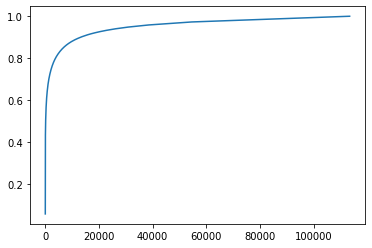

In [12]:
plot_counts(counts)

We see that we can cover most of the vocabulary with the top 10-20\% most frequently used words.

## WikiLarge

Let's repeat  the above investigation for the WikiLarge dataset.

In [13]:
train, valid, test = load_wiki('wikilarge')
len(train)

296403

In [14]:
train.head()

,source,target
0,There is manuscript evidence that Austen conti...,There is some proof that Austen continued to w...
1,"In a remarkable comparative analysis , Mandaea...",Mandaean scholar Säve-Söderberg showed that Ma...
2,"Before Persephone was released to Hermes , who...",When Demeter went to the Underworld to rescue ...
3,Cogeneration plants are commonly found in dist...,Cogeneration plants are commonly found in dist...
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",The city 's main newspaper is the Tribune de G...


In [15]:
counts = count_tokens(train['source'])

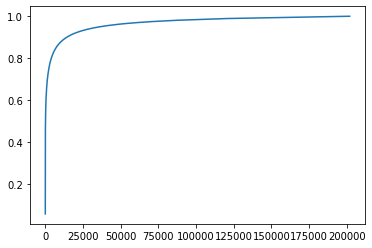

In [16]:
plot_counts(counts)